In [1]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Queries / Questions being investigated through the Data,

As a football fan, I'm interested in exploring FIFA-2019 Complete Dataset of players. I will be trying to answer the following questionnaires through the data analysis I am gonna do here :

##### Question 1: List of 25 nations in Decending Order, having more number of Soccer Players according the latest FIFA-2019 datasets available on the Kaggle website.

##### Question 2: Listing 10 clubs in descending order, with the highest total player market value and the highest average player wage. 

##### Question 3: AGE-WISE distribution of the players present in FIFA-2019.

##### Question 4: Selection of the best Squad according to the preferref position of the players.

##### Question 5: FInding the correlation between features such as Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage.

Understanding these questions may provide some advice to the Football Club Manager, no matter in Video Game, or in real Professional football.

### Data Understanding
Through this project, we will use FIFA-2019 Complete Player Dataset from kaggle. For this project, I will use the data2019.csv which contains all the information of the Players of FIFA-2019. 

Here we go.

In [2]:
# Read in the Dataset file "data2019" downloaded from Kaggle.
data2019 = pd.read_csv('./data2019.csv')
data2019.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Basic Description of the dataset
data2019.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
# Description of the datatypes of the dataset
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
#Calculate the number of rows & Columns in the dataset

num_rows = data2019.shape[0] 
num_cols = data2019.shape[1]
print("Row Number: {}".format(num_rows))
print("Column Number: {}".format(num_cols))

Row Number: 18207
Column Number: 89


### Data Preparation / Preprocessing

We gonna do the following steps as a part of Data Preparation：

1. Check columns having missing values.
2. Drop unused columns
3. Conversion of string values into numbers for Value & Wage.
4. One-Hot Encoding for Categorical variables such as Club, Nationality, Preferred Positions.

In [6]:
# Data Preparation Step 1: Check whether any column has missing values
columns_with_missing_values = set(data2019.columns[data2019.isnull().mean()!=0])
print(columns_with_missing_values)

{'International Reputation', 'Interceptions', 'Real Face', 'RCM', 'LDM', 'LCB', 'RB', 'Crossing', 'GKPositioning', 'RAM', 'ShotPower', 'Body Type', 'RF', 'Jumping', 'ST', 'Weight', 'CF', 'CAM', 'RM', 'Club', 'RDM', 'LongPassing', 'BallControl', 'Acceleration', 'LF', 'Penalties', 'Vision', 'StandingTackle', 'Release Clause', 'Work Rate', 'Preferred Positions', 'Strength', 'Positioning', 'Height', 'Aggression', 'LW', 'Dribbling', 'Skill Moves', 'Jersey Number', 'Marking', 'Contract Valid Until', 'GKDiving', 'LCM', 'Joined', 'Composure', 'Weak Foot', 'LS', 'LAM', 'Curve', 'SprintSpeed', 'Reactions', 'Finishing', 'RS', 'Stamina', 'CDM', 'RWB', 'Balance', 'Loaned From', 'RW', 'LongShots', 'HeadingAccuracy', 'GKKicking', 'ShortPassing', 'CM', 'Agility', 'Preferred Foot', 'LWB', 'FKAccuracy', 'CB', 'RCB', 'Volleys', 'GKHandling', 'GKReflexes', 'LB', 'SlidingTackle', 'LM'}


It can be observed that most of the columns with missing values are the ratings at all positions, because of Goalkeepers.  And these columns except Club, have not been used in my questions. However for Club, it can be said that a player may not belong to any club for the moment. 

Therefore, any club insterested in him may sign this player without paying any transfer fees.

In [7]:
# Data Preparation Step 2: Dropping columns which will not be used in this project
data2019.drop('Photo',     axis = 1,inplace=True)
data2019.drop('Flag',      axis = 1,inplace=True)
data2019.drop('Club Logo', axis = 1,inplace=True)
data2019.drop('ID',        axis = 1,inplace=True)
data2019.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
# Function to convert string values into numbers

def str2number(amount):
    """
    This function perform convertion from amount values in string type to float type numbers
    
    Parameter:
    amount(str): Amount values in string type with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [9]:
# Data Preparation Step 3: Conversion of string values into numbers for Value & Wage

data2019['Wage_Number']  = data2019['Wage'].map(lambda x: str2number(x))
data2019['Value_Number'] = data2019['Value'].map(lambda x: str2number(x))

In [10]:
# Data Preparation Step 4: One-Hot Encoding for Categorical variables such as Club, Nationality, Preferred Positions.

le = LabelEncoder()
data2019['Club_onehot_encode']               = le.fit_transform(data2019['Club'].astype(str))
data2019['Nationality_onehot_encode']        = le.fit_transform(data2019['Nationality'].astype(str))
data2019['Preferred Positions_onehot_encode'] = le.fit_transform(data2019['Preferred Positions'].astype(str))

### Solution to the queries raised above: 

Since data preprocessing/preparation is over, we may try to the answer the questions as raised above:

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Name: Nationality, dtype: int64


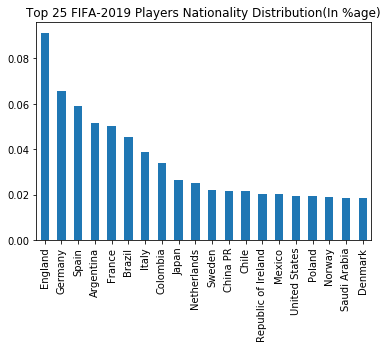

In [11]:
# Question 1: List of 25 nations in Decending Order, having more number of Soccer Players according the latest FIFA-2019 datasets available on the Kaggle website.
nationality_vals = data2019.Nationality.value_counts()
print(nationality_vals.head(25))

(nationality_vals.head(20)/data2019.shape[0]).plot(kind="bar");
plt.title("Top 25 FIFA-2019 Players Nationality Distribution(In %age)");

We can derive from the above result and plot that England, Germany and Spain are the top 3 nations having more number of players in FIFA-2019. France is at 5th position which is also an European nation. It can be justified as Barclays Premier League, Bundesliga, La Liga and Ligue 1 are among the Five Football Leagues in Europe. These leagues represent the best football in Europe and even in the world, attracting many football stars and often guiding the new direction of football development. 

The 4th & 6th ranking is Agentina and Brazil which have the most gifted football players in the world.

It’s clear that most players are between 21–25 years old. It’s reasonable as this age group is the best years of athletes. Players younger than that may not have the enough skills and experiences and also may not have the chance to prove themself on the football field yet. Players elder than 30 may already retire from the football filed. Thus the number for players elder than 30 drops with the growth of age.

In [12]:
# Question 2: Listing 10 clubs in descending order, with the highest total player market value and the highest average player wage.
Value_Wage_DF = data2019[["Name", "Club", "Value_Number", "Wage_Number"]]
Value_Wage_DF.head(10)

,Name,Club,Value_Number,Wage_Number
0,L. Messi,FC Barcelona,110500000.0,565000.0
1,Cristiano Ronaldo,Juventus,77000000.0,405000.0
2,Neymar Jr,Paris Saint-Germain,118500000.0,290000.0
3,De Gea,Manchester United,72000000.0,260000.0
4,K. De Bruyne,Manchester City,102000000.0,355000.0
5,E. Hazard,Chelsea,93000000.0,340000.0
6,L. Modrić,Real Madrid,67000000.0,420000.0
7,L. Suárez,FC Barcelona,80000000.0,455000.0
8,Sergio Ramos,Real Madrid,51000000.0,380000.0
9,J. Oblak,Atlético Madrid,68000000.0,94000.0


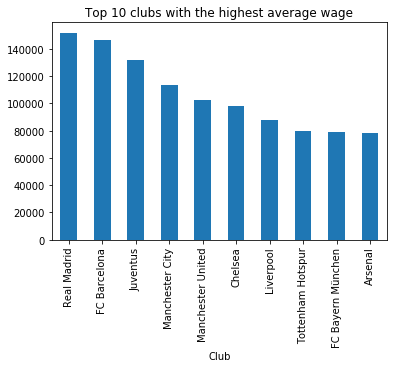

In [13]:
# Top 10 clubs with the highest average wage
Value_Wage_DF.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wage");

As observed from plot, Real Madrid, FC Barcelona & Juventus are the top3 clubs who is paying highest average wage to its players. High paying in wage also help these clubs to attract the most valuable players to play for the clubs.

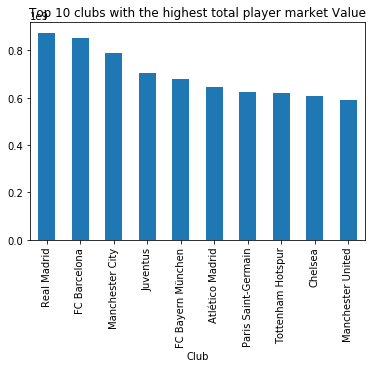

In [14]:
# Top 10 clubs with the highest total player market value
Value_Wage_DF.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest total player market Value");

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
Name: Age, dtype: int64


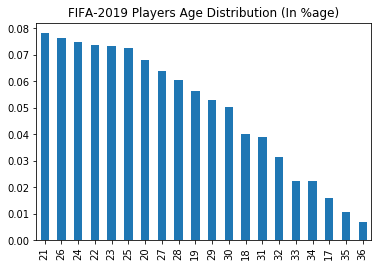

In [15]:
# Question 3: AGE-WISE distribution of the players present in FIFA-2019.
age_vals = data2019.Age.value_counts()
print(age_vals.head(20))

(age_vals.head(20)/data2019.shape[0]).plot(kind="bar");
plt.title("FIFA-2019 Players Age Distribution (In %age)");

It can be clearly understood from the plot that the most players are between 21–25 years old. People at this age group are the best years of athletes in lifetime. Players younger than that may not have enough skills and experiences, whereas players above that might have already retired from the football. So, there is a drop in those age groups.

In [16]:
# Question 4: Selection of the best Squad according to the preferref position of the players.
BestSquad_DF = data2019[['Name', 'Age', 'Overall', 'Potential', 'Preferred Positions']]
BestSquad_DF.head(5)

,Name,Age,Overall,Potential,Preferred Positions
0,L. Messi,31,94,94,RF
1,Cristiano Ronaldo,33,94,94,ST
2,Neymar Jr,26,92,93,LW
3,De Gea,27,91,93,GK
4,K. De Bruyne,27,91,92,RCM


On the pattern of video game FIFA-2019, human player selects expert players for each position to win the matches. Likewise, also includes a game mode to ask gamer to play as a role of a football manager. Based on FIFA-2019 dataset, we will try to find the best squad according to the preferred positions of the star players. Here, I have considered two best squads such as: Formation 4–3–3 and Formation 3–4–1–2.

In [17]:
def find_best_squad(position):
    """
    This function perform selection of the player with highest Overall Value for each provided position
    
    Parameter:
    position(str): a particular position of a certain footbal formation
    
    Returns:
    Position: The position from Input Parameter
    Player:   The Best Player Name for this Position
    Overall:  The Overall Value for this Best Player
    """
    BestSquad_DF_copy = BestSquad_DF.copy()
    BestSquad = []
    for i in position:
        BestSquad.append([i,BestSquad_DF_copy.loc[[BestSquad_DF_copy[BestSquad_DF_copy['Preferred Positions'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), BestSquad_DF_copy[BestSquad_DF_copy['Preferred Positions'] == i]['Overall'].max()])
        BestSquad_DF_copy.drop(BestSquad_DF_copy[BestSquad_DF_copy['Preferred Positions'] == i]['Overall'].idxmax(), inplace = True)

    return pd.DataFrame(np.array(BestSquad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [18]:
# Formation 4-3-3
squad_Formation433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('Best Squad of Formation 4-3-3')
print (find_best_squad(squad_Formation433))

Best Squad of Formation 4-3-3
Position              Player Overall
      GK              De Gea      91
      LB             Marcelo      88
      CB            D. Godín      90
      CB           S. Umtiti      87
      RB         Azpilicueta      86
      LM       P. Aubameyang      88
     CDM     Sergio Busquets      89
      RM           K. Mbappé      88
      LW           Neymar Jr      92
      ST   Cristiano Ronaldo      94
      RW      Bernardo Silva      86


In [19]:
# Formation 3-4-1-2
squad_Formation3412 = ['GK', 'CB', 'CB', 'CB', 'LM', 'CM', 'CM', 'RM', 'CAM', 'ST', 'ST']
print ('Best Squad of Formation 3-4-1-2')
print (find_best_squad(squad_Formation3412))

Best Squad of Formation 3-4-1-2
Position                Player Overall
      GK                De Gea      91
      CB              D. Godín      90
      CB             S. Umtiti      87
      CB            M. Benatia      86
      LM         P. Aubameyang      88
      CM                Thiago      86
      CM   S. Milinković-Savić      85
      RM             K. Mbappé      88
     CAM          A. Griezmann      89
      ST     Cristiano Ronaldo      94
      ST        R. Lewandowski      90


In [20]:
# Question 5: Finding the correlation between features such as Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage.
Correlation_DF = data2019[['Name', 'Age', 'Overall', 'Potential', 'Preferred Positions_onehot_encode', 'Club_onehot_encode', 'Nationality_onehot_encode', 'Special', 'Value_Number', 'Wage_Number']]

Correlation_DF.corr()

,Age,Overall,Potential,Preferred Positions_onehot_encode,Club_onehot_encode,Nationality_onehot_encode,Special,Value_Number,Wage_Number
Age,1.000000,0.452350,-0.253312,-0.001042,0.001995,-0.030824,0.236695,0.075022,0.141145
Overall,0.452350,1.000000,0.660939,0.063312,0.004888,-0.011851,0.606960,0.627085,0.571926
Potential,-0.253312,0.660939,1.000000,0.024432,-0.009493,0.007352,0.383727,0.576218,0.486413
Preferred Positions_onehot_encode,-0.001042,0.063312,0.024432,1.000000,0.003737,-0.007693,0.201667,0.047040,0.041511
Club_onehot_encode,0.001995,0.004888,-0.009493,0.003737,1.000000,0.008392,0.001655,-0.001411,-0.019516
Nationality_onehot_encode,-0.030824,-0.011851,0.007352,-0.007693,0.008392,1.000000,-0.005249,-0.009965,-0.020944
Special,0.236695,0.606960,0.383727,0.201667,0.001655,-0.005249,1.000000,0.377738,0.347835
Value_Number,0.075022,0.627085,0.576218,0.047040,-0.001411,-0.009965,0.377738,1.000000,0.858442
Wage_Number,0.141145,0.571926,0.486413,0.041511,-0.019516,-0.020944,0.347835,0.858442,1.000000


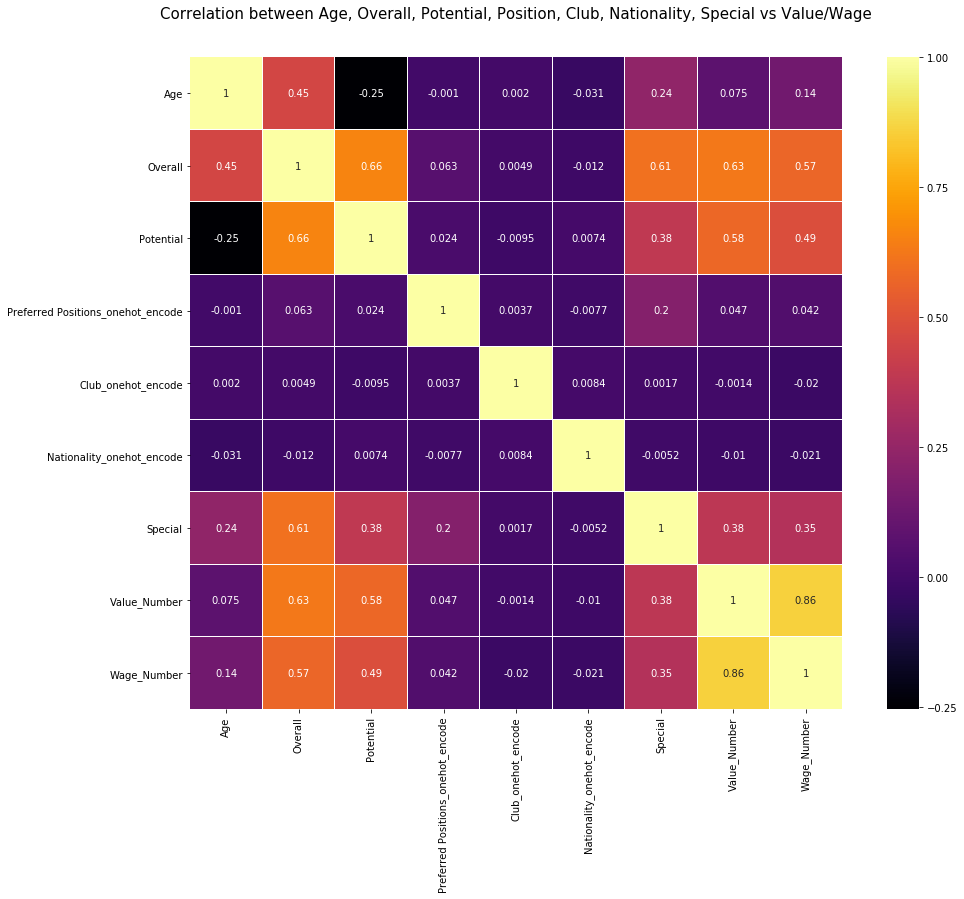

In [21]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

The above correlation heatmap shows that Overall & Potential are the most postive related to Wage & Value. Special have the positive correlation with Wage & Value. Also, We can find that Wage and Value are highly correlated to each other. However, Club, Nationality and Position are not so important features that relate to Wage & Value. Besides that, 